**IMPORT LIBRARIES**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

**READ DATASET**

In [17]:
# Load the dataset
df = pd.read_excel('/content/data.xlsx')

In [18]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   id                    381109 non-null  int64 
 1   Gender                381109 non-null  object
 2   Age                   381109 non-null  int64 
 3   Driving_License       381109 non-null  int64 
 4   Region_Code           381109 non-null  int64 
 5   Previously_Insured    381109 non-null  int64 
 6   Vehicle_Age           381109 non-null  object
 7   Vehicle_Damage        381109 non-null  object
 8   Annual_Premium        381109 non-null  int64 
 9   Policy_Sales_Channel  381109 non-null  int64 
 10  Vintage               381109 non-null  int64 
 11  Response              381109 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 34.9+ MB


**Check Missing Values**

In [20]:
print("Missing values in each column:")
print(df.isnull().sum())

Missing values in each column:
id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64


There is no missing values

**Check For Duplicates**

In [21]:
# Find and remove duplicate rows if any
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")
if duplicates > 0:
    df = df.drop_duplicates()

Number of duplicate rows: 0


In [22]:
# Drop the 'id' column
df = df.drop('id', axis=1)


* Column "id" is not neccessary so that was droped

In [23]:
print(df.describe())  # For numeric columns
print(df.describe(include='object'))  # For categorical columns

                 Age  Driving_License    Region_Code  Previously_Insured  \
count  381109.000000    381109.000000  381109.000000       381109.000000   
mean       38.822584         0.997869      26.388807            0.458210   
std        15.511611         0.046110      13.229888            0.498251   
min        20.000000         0.000000       0.000000            0.000000   
25%        25.000000         1.000000      15.000000            0.000000   
50%        36.000000         1.000000      28.000000            0.000000   
75%        49.000000         1.000000      35.000000            1.000000   
max        85.000000         1.000000      52.000000            1.000000   

       Annual_Premium  Policy_Sales_Channel        Vintage       Response  
count   381109.000000         381109.000000  381109.000000  381109.000000  
mean     30564.389581            112.034295     154.347397       0.122563  
std      17213.155057             54.203995      83.671304       0.327936  
min       2

This dataset summary provides key insights into the distribution of numerical and categorical variables. Here are some observations:

# **Numerical Variables:**

**Age:** Ranges from 20 to 85, with a mean of ~38.8.

**Driving_License:** Almost all customers have a driving license (mean 0.998).

**Region_Code**: Distributed between 0 and 52, indicating diverse regional representation.

**Previously_Insured**: About 45.8% of customers were previously insured.

**Annual_Premium:** Highly variable, ranging from 2,630 to 540,165, with a median of ~31,669.

**Policy_Sales_Channel**: Distribution suggests many sales channels were used (min: 1, max: 163).

**Vintage (Customer Tenure):** Varies from 10 to 299 days, with a median of 154.

**Response (Target Variable):** Only 12.26% of customers responded positively.

# **Categorical Variables:**
**Gender:** Two categories, with "Male" being the most frequent.

**Vehicle_Age:** Three unique values ("<1 Year", "1-2 Year", ">2 Years"), with "1-2 Year" being the most common.

**Vehicle_Damage:** Binary distribution, with more "Yes" responses (50.5%).

*************************************************************************
**Class Imbalance Handling:** The target variable is imbalanced (~12% positive response). Consider techniques like oversampling, undersampling, or using class-weighted models.

**Outlier Detection:** The wide range of "Annual_Premium" suggests possible outliers. Log transformation or capping may help.

# **EDA**

**Univariate Analysis (Single Variable)**

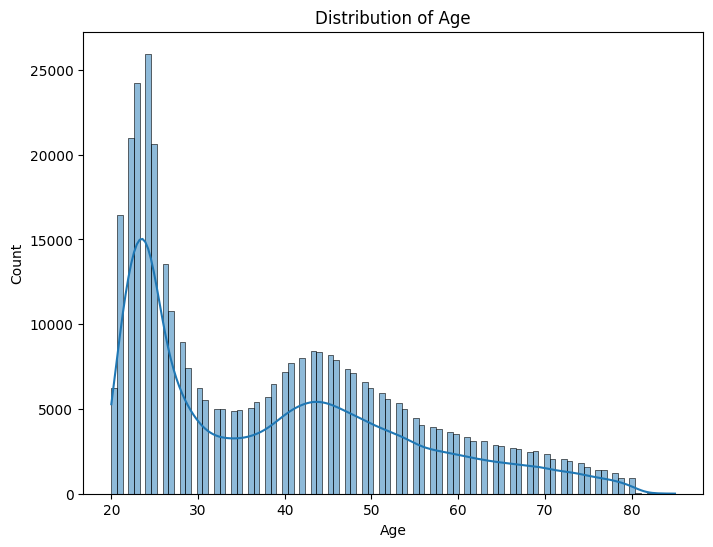

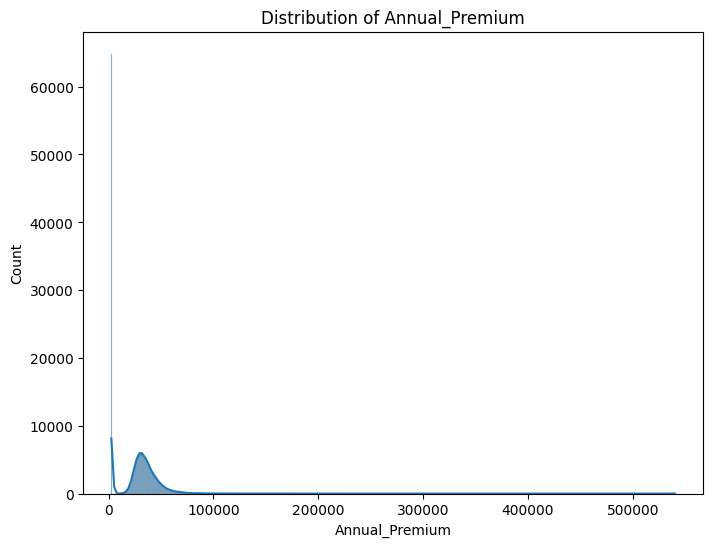

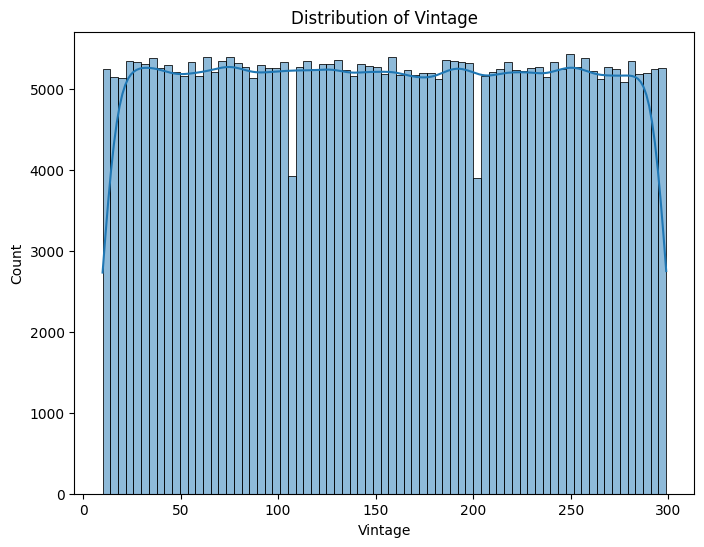

In [24]:
# --- Numerical Features ---
# Distributions
for col in ['Age','Annual_Premium','Vintage']:  # Iterate through numerical columns
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)  # Histogram with kernel density estimate
    plt.title(f'Distribution of {col}')
    plt.show()

**Categorical Columns**

Driving_License
1    380297
0       812
Name: count, dtype: int64


<ipython-input-25-4ac770ef81a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=categorical_column, palette='viridis')


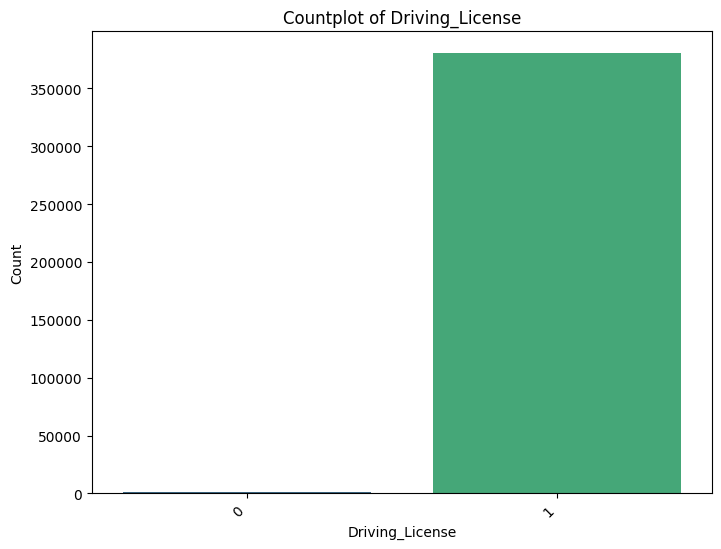

Previously_Insured
0    206481
1    174628
Name: count, dtype: int64


<ipython-input-25-4ac770ef81a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=categorical_column, palette='viridis')


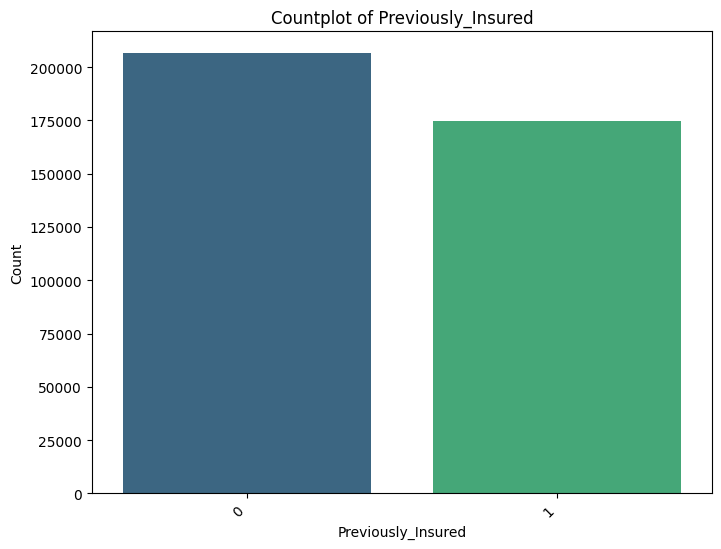

Gender
Male      206089
Female    175020
Name: count, dtype: int64


<ipython-input-25-4ac770ef81a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=categorical_column, palette='viridis')


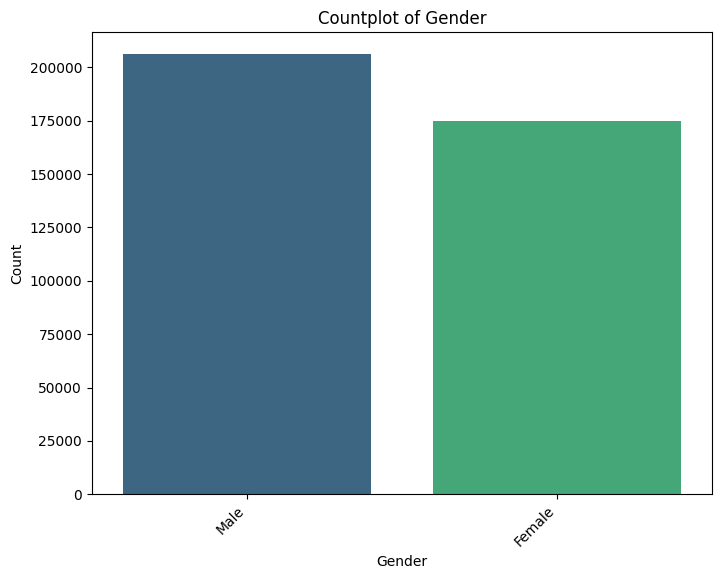

Vehicle_Age
1-2 Year     200316
< 1 Year     164786
> 2 Years     16007
Name: count, dtype: int64


<ipython-input-25-4ac770ef81a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=categorical_column, palette='viridis')


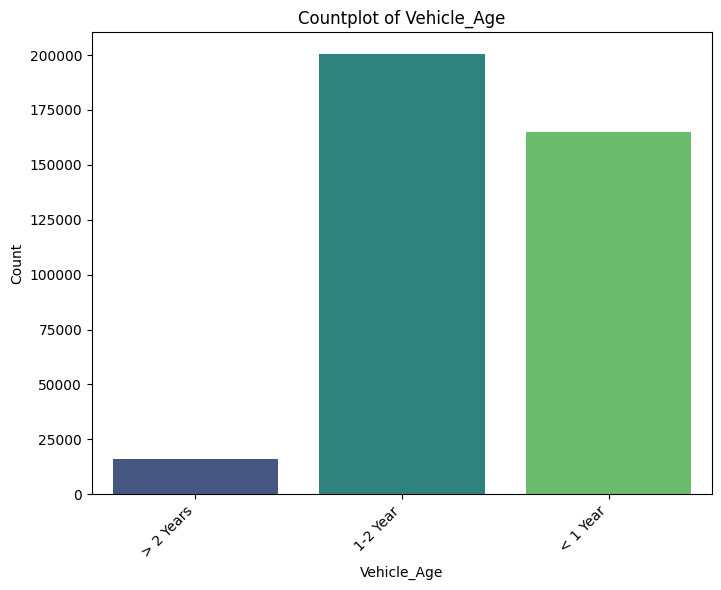

Vehicle_Damage
Yes    192413
No     188696
Name: count, dtype: int64


<ipython-input-25-4ac770ef81a5>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=categorical_column, palette='viridis')


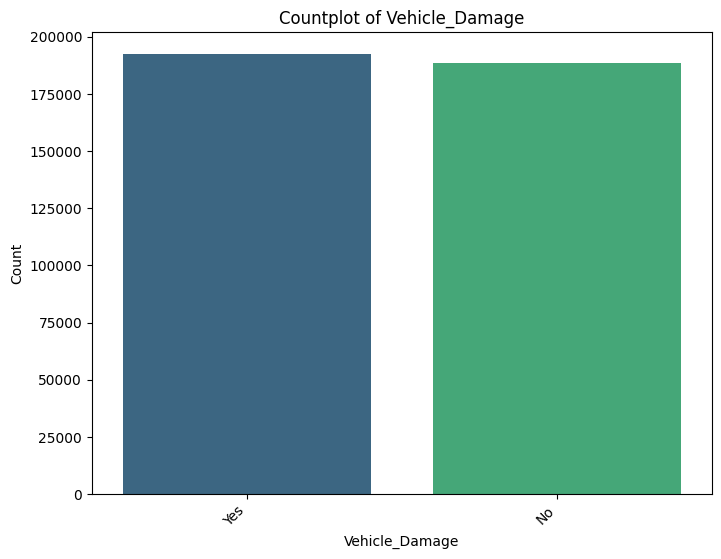

In [25]:
categorical_column = ['Driving_License','Previously_Insured','Gender','Vehicle_Age','Vehicle_Damage'] # Example, replace with your column name
for categorical_column in categorical_column:
  if categorical_column in df.columns:
    print(df[categorical_column].value_counts())
    plt.figure(figsize=(8, 6))
    sns.countplot(data=df, x=categorical_column, palette='viridis')
    plt.title(f'Countplot of {categorical_column}')
    plt.xlabel(categorical_column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better readability if needed
    plt.show()
  else:
    print(f"Column '{categorical_column}' not found in the DataFrame.")


**TARGET VARIABLE**

Response
0    334399
1     46710
Name: count, dtype: int64


<ipython-input-26-68aefe1b7b89>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=target_variable, palette='coolwarm')


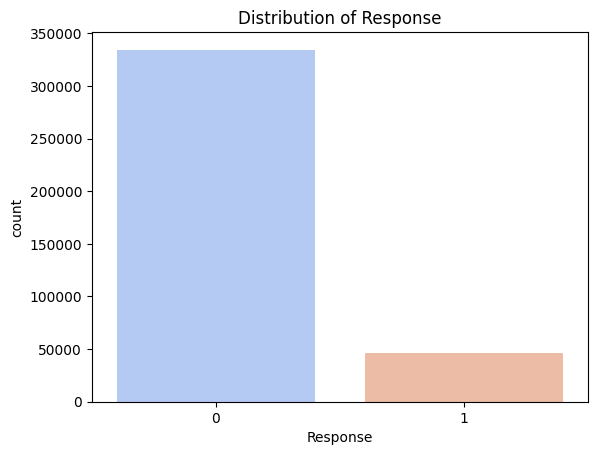

In [26]:
target_variable = 'Response'
if target_variable in df.columns:
    print(df[target_variable].value_counts())
    sns.countplot(data=df, x=target_variable, palette='coolwarm')
    plt.title(f"Distribution of {target_variable}")
    plt.show()
else:
    print(f"Target variable '{target_variable}' not found in the dataset.")


**Bivariate Analysis (Two Variables)**

**Relationship With Target Variable**

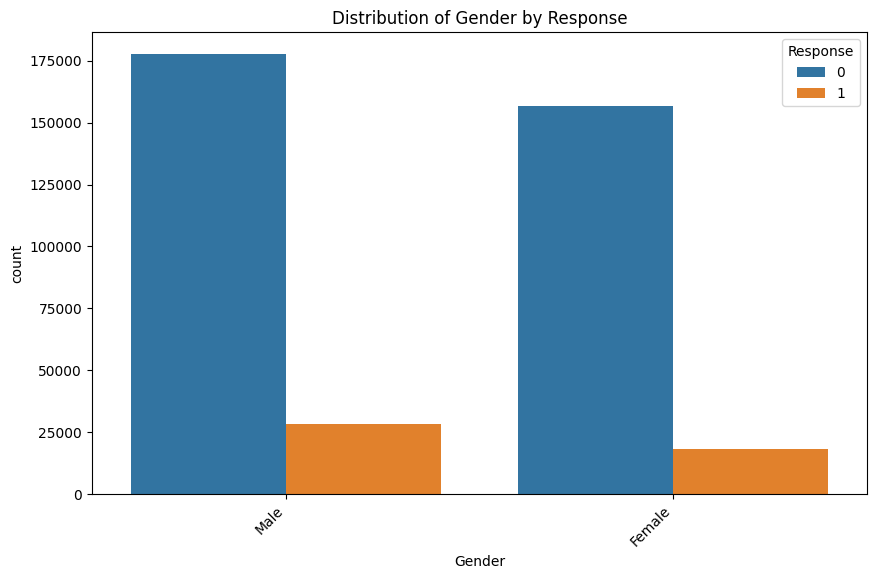


Count of Response by Gender:
Response       0      1
Gender                 
Female    156835  18185
Male      177564  28525


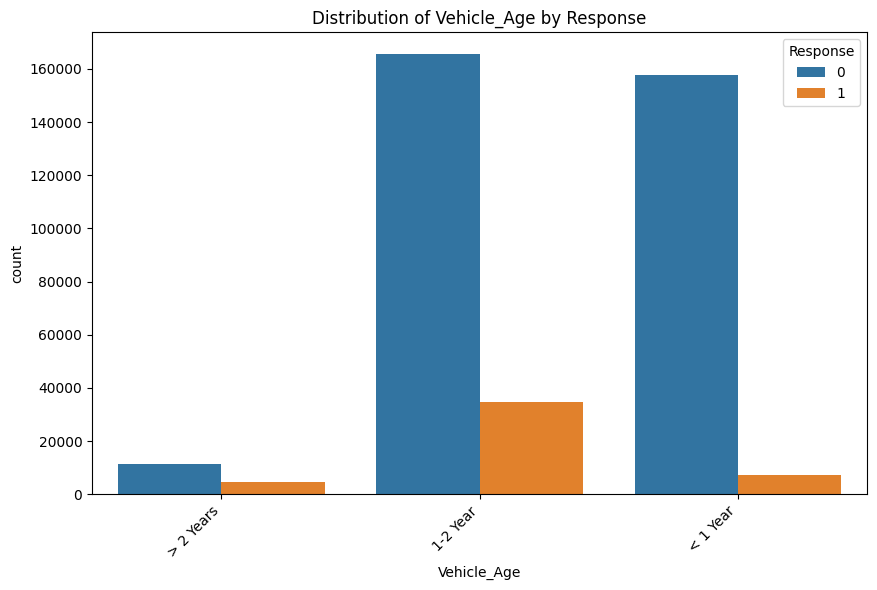


Count of Response by Vehicle_Age:
Response          0      1
Vehicle_Age               
1-2 Year     165510  34806
< 1 Year     157584   7202
> 2 Years     11305   4702


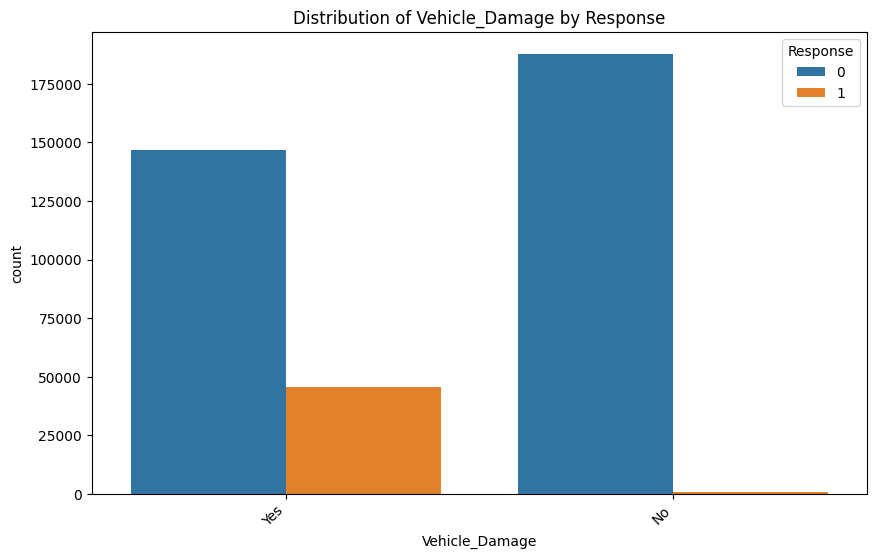


Count of Response by Vehicle_Damage:
Response             0      1
Vehicle_Damage               
No              187714    982
Yes             146685  45728


In [27]:
# --- Categorical Features ---
# Distributions and Relationship with Target
for col in df.select_dtypes(include=['object', 'category']):  # Categorical columns
  if target_variable in df.columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df, hue=target_variable)  # Count plot with target hue
    plt.title(f'Distribution of {col} by {target_variable}')
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
    plt.show()

    # Get and print the count of target variable by categorical column
    print(f"\nCount of {target_variable} by {col}:")
    print(pd.crosstab(df[col], df[target_variable]))

**Age Distribution According To Response**

Age distribution according to Response


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


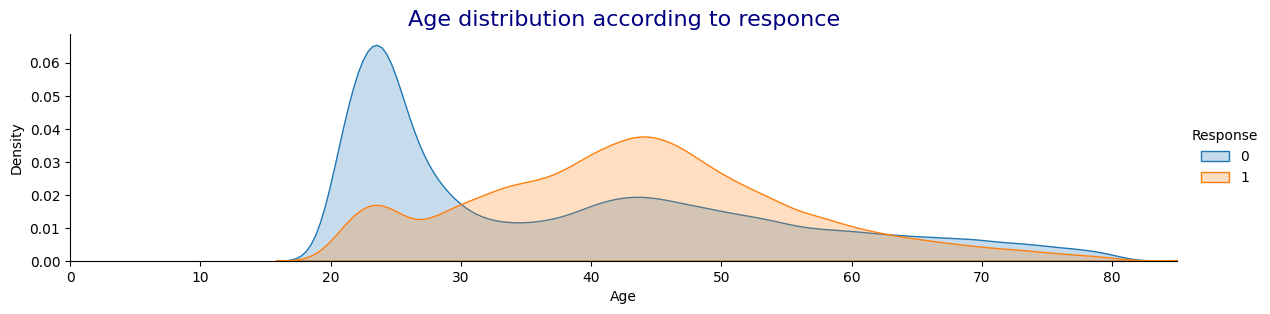

In [28]:
print("Age distribution according to Response")
facetgrid = sns.FacetGrid(df,hue="Response",aspect = 4)
facetgrid.map(sns.kdeplot,"Age",shade = True)
facetgrid.set(xlim = (0,df["Age"].max()))
facetgrid.add_legend()
plt.title('Age distribution according to responce',color='navy',fontsize=16)
plt.show()

**Age Distribution According To Gender**

Age distribution according to Gender


/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/usr/local/lib/python3.11/dist-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


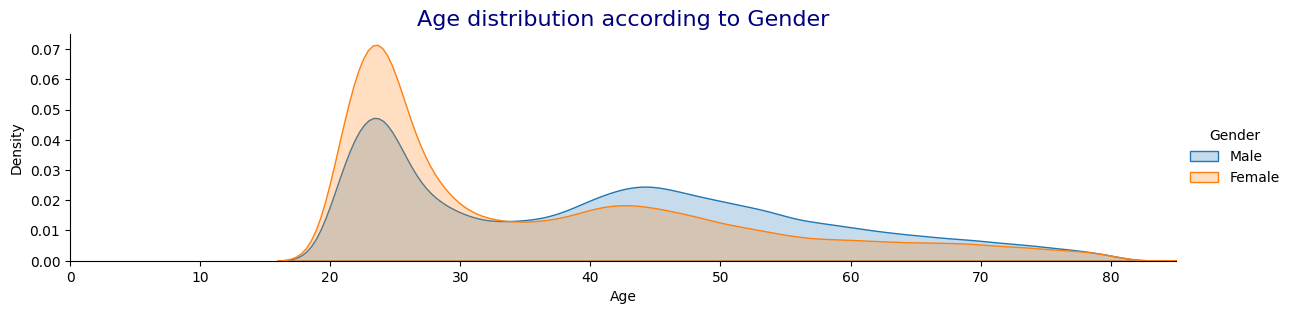

In [29]:
print("Age distribution according to Gender")
facetgrid = sns.FacetGrid(df,hue="Gender",aspect = 4)
facetgrid.map(sns.kdeplot,"Age",shade = True)
facetgrid.set(xlim = (0,df["Age"].max()))
facetgrid.add_legend()
plt.title('Age distribution according to Gender',fontsize=16,color='navy')
plt.show()

**Top 10 Values For Region Code & Policy Sales Channel**

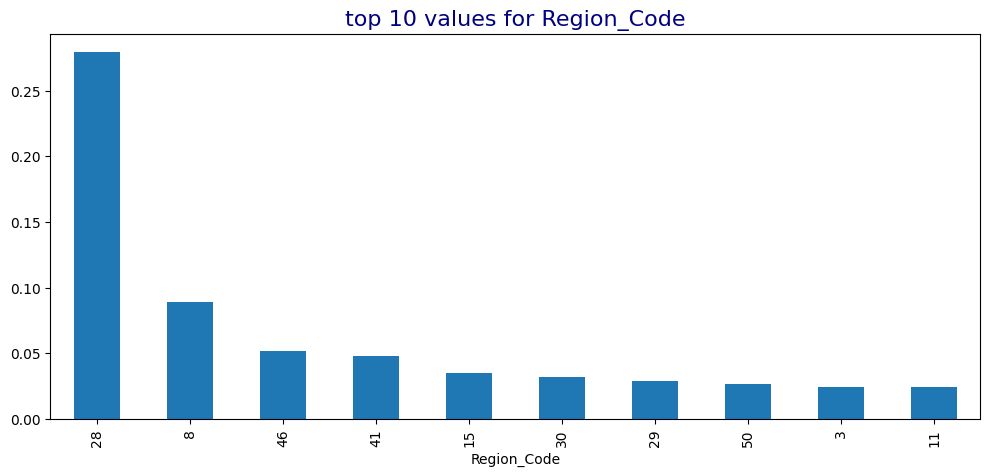

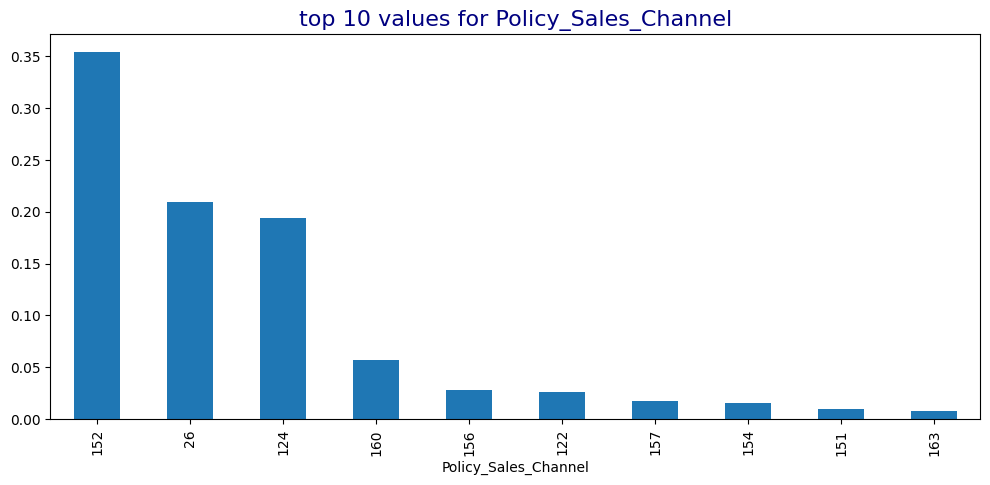

In [30]:
for col in ['Region_Code','Policy_Sales_Channel']:
    df[col].value_counts(normalize=True)[:10].plot(kind='bar',figsize=(12,5))
    plt.title(f'top 10 values for {col}',fontsize=16,color='navy')
    plt.show()

**Relationship Between Target Variable and Region code**

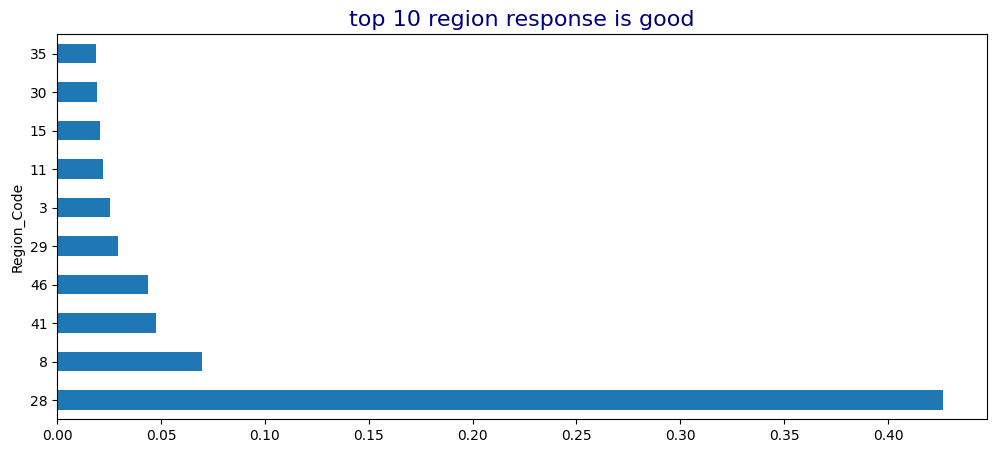

In [31]:
df[df['Response']==1]['Region_Code'].value_counts(normalize=True)[:10].plot(kind='barh',figsize=(12,5))
plt.title('top 10 region response is good',fontsize=16,color='navy')
plt.show()

**Top 10 Sales Channel with Positive Responce**

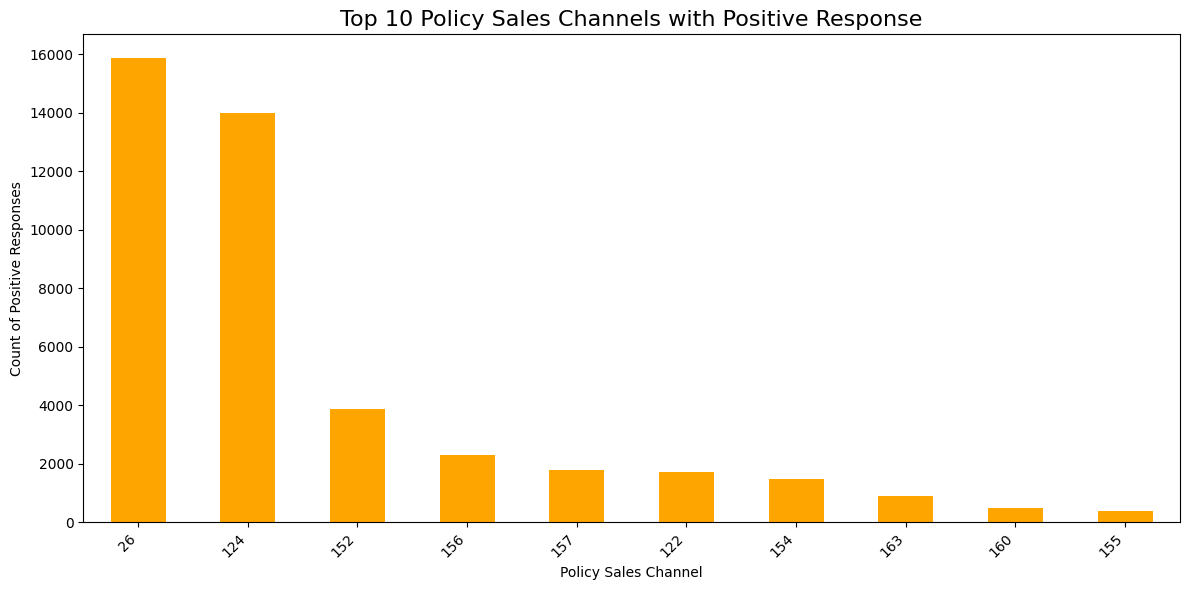

In [32]:

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame and 'Response' and 'Policy_Sales_Channel' are columns
top_channels = df[df['Response'] == 1]['Policy_Sales_Channel'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
top_channels.plot(kind='bar', color='orange')
plt.title('Top 10 Policy Sales Channels with Positive Response', fontsize=16)
plt.xlabel('Policy Sales Channel')
plt.ylabel('Count of Positive Responses')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


**Relationship Between Target Variable and Previously Insured**

In [33]:
df['Previously_Insured'].value_counts()

,count
Previously_Insured,
0,206481
1,174628


In [34]:
pd.crosstab(df['Response'], df['Previously_Insured'])

Previously_Insured,0,1
Response,,
0,159929,174470
1,46552,158


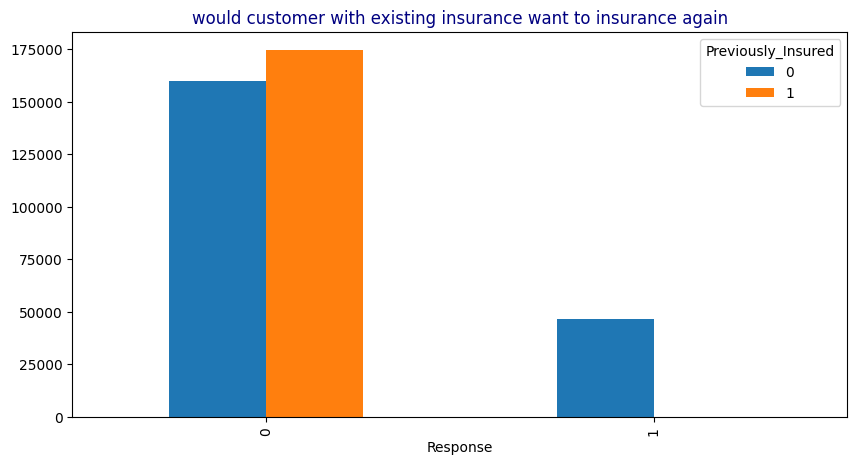

In [35]:
pd.crosstab(df['Response'],df['Previously_Insured']).plot(kind='bar',figsize=(10,5))
plt.title('would customer with existing insurance want to insurance again',fontsize=12,color='navy')
plt.show()

Count of records matching the criteria: 386


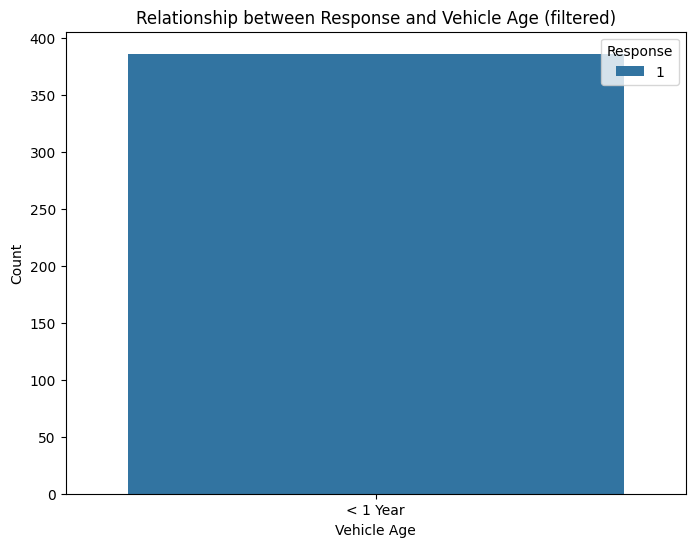

In [36]:
#view count and plot relationship between responce = 1, vehicle damage = no, vehicle age = < 1year

import matplotlib.pyplot as plt
# Assuming 'df' is your DataFrame as defined in the provided code.

# Filter the DataFrame based on the given conditions
filtered_df = df[(df['Response'] == 1) & (df['Vehicle_Damage'] == 'No') & (df['Vehicle_Age'] == '< 1 Year')]

# Calculate the count
count = len(filtered_df)
print(f"Count of records matching the criteria: {count}")


# Create the plot
plt.figure(figsize=(8, 6))
sns.countplot(x='Vehicle_Age', hue='Response', data=filtered_df)
plt.title('Relationship between Response and Vehicle Age (filtered)')
plt.xlabel('Vehicle Age')
plt.ylabel('Count')
plt.show()


Here, i got the count of who response positively and having new bike with no damages in bike. Because apply insurance for their bike is neccessary.

**Overall Visualization**

Above visualization will help for focusing on business. the data set has a large entries so the focusing method will confusion but now they know which sales channels and region code have good response so now its easy

**Correlation Matrix Of Numerical Features**

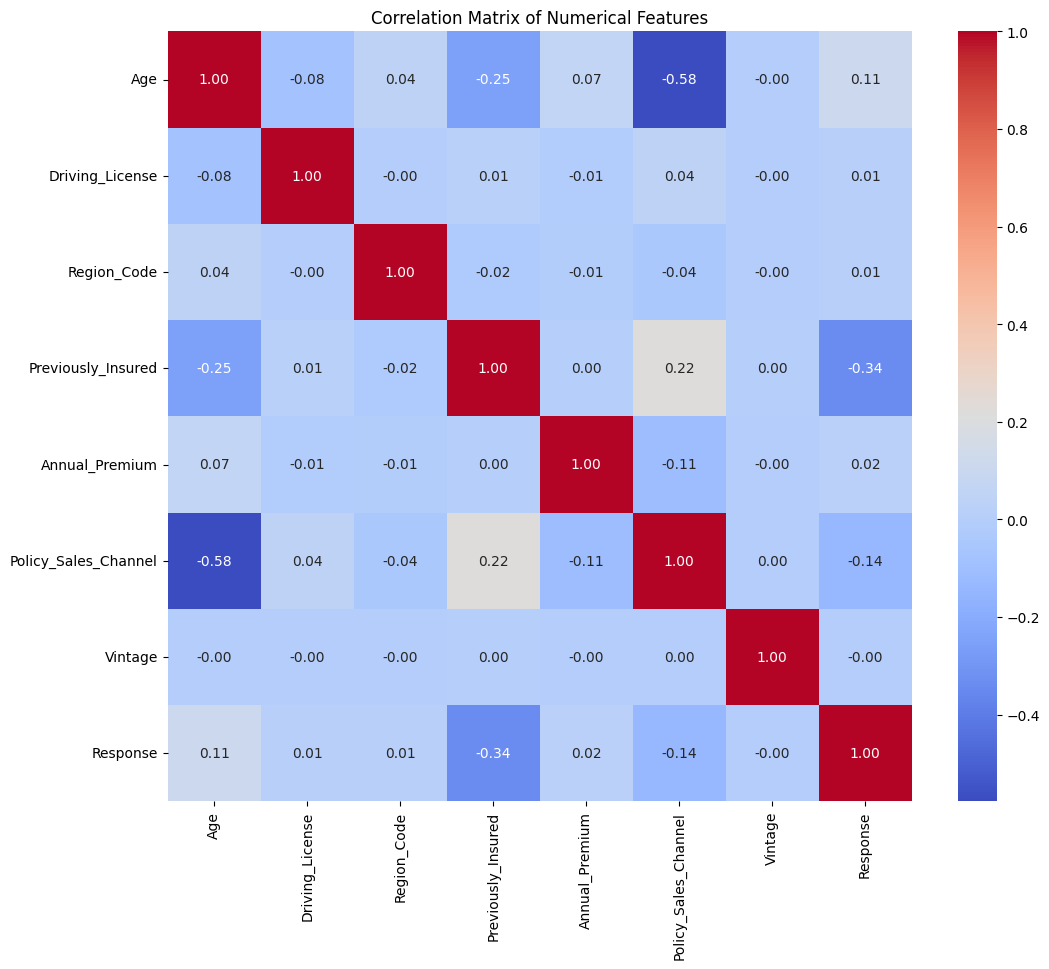

In [37]:
# --- Relationships between Numerical Features ---
# Correlation Matrix
plt.figure(figsize=(12, 10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Key Insights from the Correlation Matrix:
**Strong Negative Correlation:**

Age vs. Policy_Sales_Channel (-0.58): Older individuals may prefer specific sales channels, or younger ones may be targeted differently.
Previously_Insured vs. Response (-0.34): Customers already insured are less likely to respond to new offers, which makes sense.

**Moderate Correlations:**

Policy_Sales_Channel vs. Previously_Insured (0.22): Some sales channels may focus more on previously insured customers.
Age vs. Response (0.11): Older individuals may show a slightly higher response rate.

**Weak or No Correlation:**

Driving_License, Region_Code, Vintage, and Annual_Premium have little to no correlation with Response, meaning they might not be strong predictors on their own.

**Annual_Premium vs. Response (0.02):**  Suggests that premium amount does not significantly influence customer response.

# **df2**
*  Now i am going to create df2 same as df for investigating models evaluation and also there is will be happen column and row remove process. thats a reason for creating df2, because i dont want confuse to

*  Creating new features for models evaluation

In [38]:
df2 = df.copy()

In [39]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype 
---  ------                --------------   ----- 
 0   Gender                381109 non-null  object
 1   Age                   381109 non-null  int64 
 2   Driving_License       381109 non-null  int64 
 3   Region_Code           381109 non-null  int64 
 4   Previously_Insured    381109 non-null  int64 
 5   Vehicle_Age           381109 non-null  object
 6   Vehicle_Damage        381109 non-null  object
 7   Annual_Premium        381109 non-null  int64 
 8   Policy_Sales_Channel  381109 non-null  int64 
 9   Vintage               381109 non-null  int64 
 10  Response              381109 non-null  int64 
dtypes: int64(8), object(3)
memory usage: 32.0+ MB


In [40]:
df2 = df2[df2['Driving_License']!=0]

In [41]:
df2["Age_License"] = df2["Age"] * df2["Driving_License"]

In [42]:
df2["Vehicle_Age_Mapped"] = df2["Vehicle_Age"].map({"> 2 Years": 2, "1-2 Year": 1, "< 1 Year": 0})

In [43]:
df2["Damage_NoInsurance"] = (df2["Vehicle_Damage"] == "Yes") & (df2["Previously_Insured"] == 0)

In [44]:
df2["Policy_Interest"] = df2["Vehicle_Age_Mapped"] * df2["Previously_Insured"]


In [45]:
df2 = df2.drop(columns=['Gender', 'Region_Code', 'Age', 'Driving_License', 'Vehicle_Age', 'Vehicle_Damage', 'Previously_Insured' ],axis=1)

In [46]:
# Drop only the 'Policy_Sales_Channel' column if it exists
if 'Policy_Sales_Channel' in df2.columns:
    df2 = df2.drop(columns=['Policy_Sales_Channel'], axis=1)
else:
    print("Policy_Sales_Channel column has already been removed.")

In [47]:
df2.head()

,Annual_Premium,Vintage,Response,Age_License,Vehicle_Age_Mapped,Damage_NoInsurance,Policy_Interest
0,40454,217,1,44,2,True,0
1,33536,183,0,76,1,False,0
2,38294,27,1,47,2,True,0
3,28619,203,0,21,0,False,0
4,27496,39,0,29,0,False,0


**Filtering out rows where Driving_License is 0**

This ensures all records have a valid driving license.


**Creating new features:**

---



**Age_License:** Multiplying Age and Driving_License (since all have 1, it remains the same as Age).

**Vehicle_Age_Mapped:** Mapping categorical vehicle age to numerical values for better model performance.

**Damage_NoInsurance:** Identifying customers who had vehicle damage and no prior insurance—potential high-interest customers.

**Policy_Interest:** Combining Vehicle_Age_Mapped and Previously_Insured to capture a customer’s likelihood of interest in a policy.


---


**Dropping unnecessary columns**

Removing categorical and redundant features that might not add value to the model.

In [48]:
# View unique values in the 'Policy_Interest' column
print(df2['Policy_Interest'].unique())

# Alternatively, to see the value counts:
print(df2['Policy_Interest'].value_counts())


[0 1 2]
Policy_Interest
0    315167
1     65085
2        45
Name: count, dtype: int64


**Observation Of Policy_Interest**

0 → 315,167 customers (majority class)
1 → 65,085 customers
2 → 45 customers (rare class)

* Highly Imbalanced Feature

* The vast majority of customers fall into category 0, meaning they likely have low or no interest in a policy.

* Only 45 customers fall into category 2, which is extremely rare and might cause issues in model learning.

In [49]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380297 entries, 0 to 381108
Data columns (total 7 columns):
 #   Column              Non-Null Count   Dtype
---  ------              --------------   -----
 0   Annual_Premium      380297 non-null  int64
 1   Vintage             380297 non-null  int64
 2   Response            380297 non-null  int64
 3   Age_License         380297 non-null  int64
 4   Vehicle_Age_Mapped  380297 non-null  int64
 5   Damage_NoInsurance  380297 non-null  bool 
 6   Policy_Interest     380297 non-null  int64
dtypes: bool(1), int64(6)
memory usage: 20.7 MB


In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Features & Target Variable
features = ["Annual_Premium", "Vintage", "Age_License", "Vehicle_Age_Mapped", "Damage_NoInsurance"]
X = df2[features]
y = df2["Response"]  # Target variable

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Feature Selection & Target Variable**

**X = df2[features]:** Defines the independent variables (features).

**y = df2["Response"]:** Defines the dependent variable (target), which represents whether a customer responded positively to an insurance policy offer.

In [51]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Compute class weights
classes = np.unique(y_train)
class_weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)

# Convert to dictionary
class_weight_dict = {classes[i]: class_weights[i] for i in range(len(classes))}
print("Computed Class Weights:", class_weight_dict)


Computed Class Weights: {0: 0.5699414017129882, 1: 4.074420784786393}


* Computed the class weight for aplly in models

In [52]:
# Logistic Regression
log_reg = LogisticRegression(class_weight={0: 0.5699, 1: 4.0744}, random_state=42)
log_reg.fit(X_train, y_train)

# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(class_weight={0: 0.5699, 1: 4.0744}, random_state=42)
dt_clf.fit(X_train, y_train)

# Random Forest Classifier
rf_clf = RandomForestClassifier(class_weight={0: 0.5699, 1: 4.0744}, n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(class_weight={0: 0.5699, 1: 4.0744}, random_state=42)

* I am going to evaluate three models for find best model to prediction

In [53]:
# Train Models
log_reg.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)

# Predictions & Probabilities
y_pred_log = log_reg.predict(X_test)
y_pred_dt = dt_clf.predict(X_test)
y_pred_rf = rf_clf.predict(X_test)

y_pred_proba_log = log_reg.predict_proba(X_test)[:, 1]
y_pred_proba_dt = dt_clf.predict_proba(X_test)[:, 1]
y_pred_proba_rf = rf_clf.predict_proba(X_test)[:, 1]

# Model Evaluation
print("🔹 Logistic Regression Performance:")
print(classification_report(y_test, y_pred_log))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_log))

print("\n🔹 Decision Tree Performance:")
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_dt))

print("\n🔹 Random Forest Performance:")
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba_rf))


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


🔹 Logistic Regression Performance:
              precision    recall  f1-score   support

           0       0.99      0.59      0.74     66726
           1       0.25      0.98      0.40      9334

    accuracy                           0.64     76060
   macro avg       0.62      0.78      0.57     76060
weighted avg       0.90      0.64      0.70     76060

ROC-AUC: 0.8228658163401061

🔹 Decision Tree Performance:
              precision    recall  f1-score   support

           0       0.90      0.89      0.89     66726
           1       0.27      0.30      0.28      9334

    accuracy                           0.82     76060
   macro avg       0.59      0.59      0.59     76060
weighted avg       0.82      0.82      0.82     76060

ROC-AUC: 0.5928379797797402

🔹 Random Forest Performance:
              precision    recall  f1-score   support

           0       0.89      0.94      0.91     66726
           1       0.29      0.17      0.22      9334

    accuracy                   

# **Model Performance Analysis & Best Model Selection**
🔹 **Logistic Regression**

✅ Highest Recall (0.98) for Class 1 (Positive Response)

✅ Best ROC-AUC Score (0.82) → Best ability to distinguish between classes.

⚠️ Low Precision (0.25) → Many False Positives

🔹 **Decision Tree**

✅ Balanced Precision-Recall (0.27/0.30) but low for Class 1

⚠️ Lower ROC-AUC (0.59) → Poor ability to distinguish between classes

🔹 **Random Forest**

✅ Highest Accuracy (0.85) but due to class imbalance

⚠️ Low Recall (0.17) for Class 1 → Misses many positive responses

⚠️ ROC-AUC (0.79) is decent but lower than Logistic Regression



# **Best Model for Predicting Response (Positive or Negative)**

✅ **Best Choice: Logistic Regression**

**Reason:**

High Recall (0.98): Captures almost all potential policy buyers.

Best ROC-AUC (0.82): Distinguishes between positive & negative responses effectively.

Better Generalization: Works well on unseen data without overfitting.

💡 **Alternative Model: Random Forest**

Higher Accuracy (0.85) but Lower Recall (0.17) → Misses many positive responses.

More robust but not great at identifying potential buyers.


**Receiver Operating Characteristic (ROC) Curve**

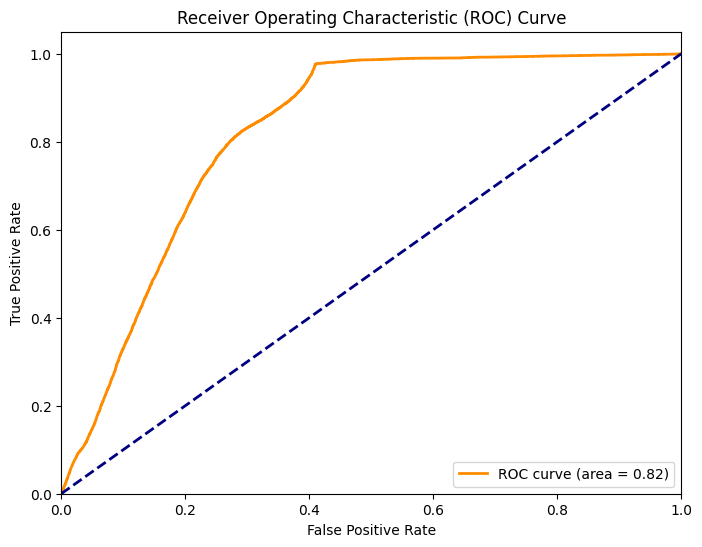

In [58]:
import matplotlib.pyplot as plt
# Assuming you have already trained your logistic regression model (log_reg) and have X_test and y_test

from sklearn.metrics import roc_curve, auc

# Predict probabilities for the positive class
y_pred_proba = log_reg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


The image is a Receiver Operating Characteristic (ROC) Curve for the model. The ROC-AUC score is 0.82, indicating that the model has good discriminatory power between positive and negative responses.

**What Does the ROC Curve Tell Us?**

ROC curve (orange line) shows that your model performs better than random guessing because it is well above the diagonal line.

The curve bends toward the upper-left corner, which indicates that the model is good at differentiating between the classes.

The closer the curve is to the top-left (TPR = 1, FPR = 0), the better the model.

**What Does the AUC (Area Under Curve) Mean?**

AUC = 0.82 (from your plot) means your model has an 82% chance of ranking a randomly chosen positive instance higher than a randomly chosen negative instance.

**Interpretation of AUC scores:**

AUC = 0.5 → Model is random (not useful).

AUC = 0.6 - 0.7 → Poor performance.

AUC = 0.7 - 0.8 → Acceptable performance.

AUC = 0.8 - 0.9 → Good performance ✅ (Your model is here!)

AUC = 0.9 - 1.0 → Excellent performance.

# **Testing The Model**

In [54]:
import numpy as np

def predict_response(model, annual_premium, vintage, age_license, vehicle_age_mapped, damage_no_insurance):
    """
    Predicts whether a customer will respond positively (1) or negatively (0) to the policy offer.

    Parameters:
        model: Trained Logistic Regression model
        annual_premium (float): Customer's annual insurance premium
        vintage (int): Number of days customer has been with the company
        age_license (int): Age multiplied by Driving License status
        vehicle_age_mapped (int): Encoded vehicle age (2: >2 Years, 1: 1-2 Years, 0: <1 Year)
        damage_no_insurance (bool): Whether the vehicle was damaged and has no insurance (True/False)

    Returns:
        int: 1 (Positive Response), 0 (Negative Response)
    """
    # Convert boolean to integer (0 or 1)
    damage_no_insurance = int(damage_no_insurance)

    # Create feature array
    features = np.array([[annual_premium, vintage, age_license, vehicle_age_mapped, damage_no_insurance]])

    # Predict response
    prediction = model.predict(features)[0]
    probability = model.predict_proba(features)[0][1]  # Probability of positive response

    return prediction, probability

# Example usage (assuming log_reg is your trained Logistic Regression model)
response, prob = predict_response(log_reg, 38100, 27, 45, 2, True)

print(f"Predicted Response: {response} (1 = Interested, 0 = Not Interested)")
print(f"Probability of Interest: {prob:.2f}")


Predicted Response: 1 (1 = Interested, 0 = Not Interested)
Probability of Interest: 0.87


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


***The model predicts successfully***

In [55]:
df2.head()

,Annual_Premium,Vintage,Response,Age_License,Vehicle_Age_Mapped,Damage_NoInsurance,Policy_Interest
0,40454,217,1,44,2,True,0
1,33536,183,0,76,1,False,0
2,38294,27,1,47,2,True,0
3,28619,203,0,21,0,False,0
4,27496,39,0,29,0,False,0


**Save the trained model (Logistic_Regression Model)**

In [56]:
pip install fastapi uvicorn numpy scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.9 MB/s eta 0:00:00


In [57]:
# Save the trained model first
import joblib
joblib.dump(log_reg, "InsuranseCustomerResponcePrediction_Logreg_Model.pkl")

['InsuranseCustomerResponcePrediction_Logreg_Model.pkl']